<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/dave-updates/code/dave_dummy_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
df = pd.read_csv('drive/MyDrive/696/text_difficulty_features.csv',sep='\t')
df.head(5)

,original_text,lemmatized_text,d_chall_score,aoa_mean,aoa_min,aoa_max,conc_rating_mean,conc_rating_min,conc_rating_max,num_lemmas,label
0,There is manuscript evidence that Austen conti...,There be manuscript evidence that Austen conti...,8.533221,5.809310,3.57,12.12,2.495517,1.33,4.57,38.0,1
1,"In a remarkable comparative analysis , Mandaea...","In a remarkable comparative analysis , Mandaea...",12.320171,7.402308,2.89,11.94,2.334286,1.46,4.93,21.0,1
2,"Before Persephone was released to Hermes , who...","Before Persephone be release to Hermes , who h...",5.931500,5.231351,2.78,11.17,2.556486,1.43,4.86,40.0,1
3,Cogeneration plants are commonly found in dist...,Cogeneration plant be commonly find in distric...,7.015012,6.742000,3.56,11.53,3.369655,1.52,4.93,32.0,1
4,Geneva is the second-most-populous city in Swi...,Geneva be the second-most-populous city in Swi...,7.550745,5.455000,3.69,12.62,2.399333,1.43,4.79,22.0,1


In [ ]:
df.dtypes

original_text        object
lemmatized_text      object
d_chall_score       float64
aoa_mean            float64
aoa_min             float64
aoa_max             float64
conc_rating_mean    float64
conc_rating_min     float64
conc_rating_max     float64
num_lemmas          float64
label                 int64
dtype: object

In [63]:
# Extract only the columns we'll use for the classifier
df = df[df.columns[:]]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Commented out so that the Training and Testing sets are preserved

# X = df[df.columns[:-1]]
# y = df.label

# X_train, X_test, y_train, y_test = train_test_split(X,y,
#                                                     test_size=.1,
#                                                     stratify=y,
#                                                     random_state=99)
#  Training_Set = pd.concat([X_train, pd.DataFrame(y_train)], axis=1)
#  Testing_Set = pd.concat([X_test, pd.DataFrame(y_test)], axis=1)
#  Testing_Set.to_csv('drive/Shareddrives/Milestone 2/Testing_set.csv', sep='\t', index=False)
# #  Training_Set.to_csv('drive/Shareddrives/Milestone 2/Training_set.csv', sep='\t', index=False)

In [26]:


train = pd.read_csv('drive/Shareddrives/Milestone 2/Training_set.csv', 
                      sep='\t',index_col='Unnamed: 0')
test = pd.read_csv('drive/Shareddrives/Milestone 2/Testing_set.csv', sep='\t',
                     index_col='Unnamed: 0')





In [27]:
train.head()

,lemmatized_text,d_chall_score,aoa_mean,aoa_min,aoa_max,conc_rating_mean,conc_rating_min,conc_rating_max,num_lemmas,label
91224,For instance the number of k-permutations of n...,4.542700,5.140000,3.94,9.57,2.577500,1.43,4.55,12.0,1
117728,Singer and bass player Roger Waters gradually ...,7.556000,5.835000,3.69,11.11,2.637727,1.33,4.62,25.0,1
316017,Other page 2005 Macquarie Fields riot 2005 Cro...,10.714000,6.456250,3.89,10.00,3.042500,1.43,4.90,25.0,0
7423,Saint-Denis be founded by Ã tienne RÃ gnault i...,8.887000,5.613637,3.69,9.39,2.545454,1.43,4.96,20.0,1
201052,Pougny be a commune in the Ain department in e...,7.722873,6.232500,2.89,12.05,2.505000,1.43,3.30,11.0,1


In [28]:
X_train = train[train.columns[:-1]]
y_train = train[train.columns[-1]]

X_test = test[test.columns[:-1]]
y_test = test[test.columns[-1]]

In [76]:
X_train.shape, X_test.shape

((355652, 9), (39517, 9))

In [75]:
metrics_df = {"model_name":[],
              "model_instance":[],
              "accuracy": [],
              "precision": [],
              "recall": [],
              "aucprc":[],
              "aucroc": []}

In [31]:
from sklearn. metrics import precision_score, recall_score, precision_recall_curve, roc_auc_score

In [32]:
from sklearn.metrics._plot.precision_recall_curve import plot_precision_recall_curve


In [33]:
def compute_metrics(model,model_name, X_test_vec, y_test):
    # extract the model's hyperparameters and make that part of the identifier for the model 

    y_pred = model.predict(X_test_vec)
    acc = model.score(X_test_vec, y_test)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    y_proba = model.predict_proba(X_test_vec)[:,1]
    prc = precision_recall_curve(y_test, y_proba)
    roc = roc_auc = roc_auc_score(y_test, y_proba)
    
    metrics_df['model_name'].append(model_name)
    metrics_df['model_instance'].append(model)
    metrics_df['accuracy'].append(acc)
    metrics_df['recall'].append(recall)
    metrics_df['precision'].append(precision)
    metrics_df['aucprc'].append(prc)
    metrics_df['aucroc'].append(roc)









### **Dummy Classifier with Tfidf Vectorizer**

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
tf_vec = TfidfVectorizer(min_df = 20,
                         stop_words='english',
                         ngram_range=(1, 3))

In [79]:
X_train_vec = tf_vec.fit_transform(X_train['lemmatized_text'])

In [80]:
from sklearn.model_selection import GridSearchCV


In [81]:
param_grid = {'strategy': ['most_frequent', 'prior', 'stratified', 'uniform']}
grid_dc_acc = GridSearchCV(DummyClassifier(), param_grid=param_grid)
grid_dc_acc.fit(X_train_vec,y_train)

GridSearchCV(estimator=DummyClassifier(),
             param_grid={'strategy': ['most_frequent', 'prior', 'stratified',
                                      'uniform']})

In [82]:
# Looks like alpha of 5 is the best parameter based on rmse
grid_dc_acc.best_params_

{'strategy': 'most_frequent'}

In [83]:
model_name = 'Tf-idf DC most_freq'
X_test_vec = tf_vec.transform(X_test['lemmatized_text'])
compute_metrics(grid_dc_acc.best_estimator_,model_name,X_test_vec, y_test)



In [84]:
metrics_df

{'model_name': ['Tf-idf DC most_freq'],
 'model_instance': [DummyClassifier(strategy='most_frequent')],
 'accuracy': [0.518915909608523],
 'precision': [0.518915909608523],
 'recall': [1.0],
 'aucprc': [(array([0.51891591, 1.        ]), array([1., 0.]), array([1.]))],
 'aucroc': [0.5]}

# Mads Features

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
X_train_mads_features = X_train.iloc[:,1:9]
X_train_mads_features.fillna(0,inplace=True)



In [88]:
X_train_mads_features.describe()

,d_chall_score,aoa_mean,aoa_min,aoa_max,conc_rating_mean,conc_rating_min,conc_rating_max,num_lemmas
count,355652.000000,355652.000000,355652.000000,355652.000000,355652.000000,355652.000000,355652.000000,355652.000000
mean,7.556820,5.754486,3.395488,10.419735,2.653873,1.461432,4.427434,19.759959
std,2.687109,1.005083,0.823235,2.597162,0.422728,0.344298,0.684466,10.539020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.729000,5.227500,2.890000,8.780000,2.443200,1.430000,4.170000,12.000000
50%,7.461543,5.676957,3.280000,10.500000,2.636000,1.430000,4.690000,18.000000
75%,9.158327,6.205271,3.690000,12.110000,2.860588,1.430000,4.880000,25.000000
max,18.716400,18.330000,18.330000,25.000000,5.000000,5.000000,5.000000,76.000000


In [95]:
 std_scaler = StandardScaler()
 X_train_mads_features_std = std_scaler.fit_transform(X_train_mads_features)

In [90]:
grid_dc_mads_acc = GridSearchCV(DummyClassifier(), param_grid=param_grid)
grid_dc_mads_acc.fit(X_train_mads_features_std,y_train)

GridSearchCV(estimator=DummyClassifier(),
             param_grid={'strategy': ['most_frequent', 'prior', 'stratified',
                                      'uniform']})

In [91]:
grid_dc_mads_acc.best_estimator_

DummyClassifier(strategy='most_frequent')

In [92]:
X_test_mads_features = X_test.iloc[:,1:9]


In [96]:
X_test_mads_features.fillna(0,inplace=True)
X_test_mads_features_std = std_scaler.transform(X_test_mads_features)

In [97]:
model_name = 'MADS DC most freq'
compute_metrics(grid_dc_mads_acc,model_name,X_test_mads_features_std, y_test)

# tfidf + Mads Features

In [98]:
import scipy
from scipy.sparse import hstack
import numpy as np

In [99]:
# Create a sparse matrix from the MADS features
X_sparse = scipy.sparse.coo_matrix(X_train_mads_features_std)

# Join both the tfidf training matrix with the sparse MADS features
X_train_all = scipy.sparse.hstack((X_train_vec, X_sparse)).tocsr()




In [100]:
grid_dc_all_acc= GridSearchCV(DummyClassifier(), param_grid=param_grid)
grid_dc_all_acc.fit(X_train_all,y_train)



GridSearchCV(estimator=DummyClassifier(),
             param_grid={'strategy': ['most_frequent', 'prior', 'stratified',
                                      'uniform']})

In [101]:
grid_dc_all_acc.best_estimator_

DummyClassifier(strategy='most_frequent')

In [102]:
# Update the test data: convert mads features to sparse, create
# one matrix for both the tfidf vec and mads features

X_test_sparse = scipy.sparse.coo_matrix(X_test_mads_features_std)

X_test_all = scipy.sparse.hstack((X_test_vec,
                                  X_test_sparse))

In [103]:
model_name = 'Tf-idf Mads DC most freq'

# compute metrics from the test split data
compute_metrics(grid_dc_all_acc.best_estimator_,
                model_name,
                X_test_all,
                y_test)

# Sentence Embeddings

In [104]:
from numpy import loadtxt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [105]:
embeddings = loadtxt('drive/Shareddrives/Milestone 2/embeddings.csv', delimiter=',')
embeddings

array([[-0.10521097,  0.04652381,  0.09932816, ..., -0.53146267,
         0.24081262,  0.04764764],
       [-0.09595645,  0.28408318,  0.0416585 , ..., -0.6049515 ,
         0.23389882,  0.2116979 ],
       [ 0.00624134,  0.04496894,  0.28006756, ..., -0.21483139,
         0.40460399, -0.12047322],
       ...,
       [-0.05062665,  0.11346165,  0.37695   , ..., -0.35318942,
         0.46983531, -0.04529605],
       [-0.13691955,  0.46627818, -0.0528408 , ..., -0.55561154,
         0.56975963,  0.25214309],
       [-0.23494626,  0.30814424,  0.28275521, ..., -0.56363898,
         0.44196188,  0.01724233]])

In [60]:
embeddings.shape

(395169, 100)

In [106]:
# Combine the embeddings and the original_text + Mads features
emb = pd.DataFrame(embeddings)
new_df = pd.concat([df,emb], axis=1)
new_df.head()

,original_text,lemmatized_text,d_chall_score,aoa_mean,aoa_min,aoa_max,conc_rating_mean,conc_rating_min,conc_rating_max,num_lemmas,...,90,91,92,93,94,95,96,97,98,99
0,There is manuscript evidence that Austen conti...,There be manuscript evidence that Austen conti...,8.533221,5.809310,3.57,12.12,2.495517,1.33,4.57,38.0,...,-0.000574,-0.282132,0.048765,0.281763,-0.562752,-0.018829,-0.266238,-0.531463,0.240813,0.047648
1,"In a remarkable comparative analysis , Mandaea...","In a remarkable comparative analysis , Mandaea...",12.320171,7.402308,2.89,11.94,2.334286,1.46,4.93,21.0,...,0.142222,-0.103547,-0.090528,0.095581,-0.276107,0.028346,-0.250517,-0.604951,0.233899,0.211698
2,"Before Persephone was released to Hermes , who...","Before Persephone be release to Hermes , who h...",5.931500,5.231351,2.78,11.17,2.556486,1.43,4.86,40.0,...,-0.042911,-0.127006,-0.027232,0.002538,-0.531988,-0.153132,-0.162387,-0.214831,0.404604,-0.120473
3,Cogeneration plants are commonly found in dist...,Cogeneration plant be commonly find in distric...,7.015012,6.742000,3.56,11.53,3.369655,1.52,4.93,32.0,...,0.113040,-0.480430,-0.121593,0.049611,-0.675361,0.358477,-0.145952,-0.454261,0.618850,0.002099
4,Geneva is the second-most-populous city in Swi...,Geneva be the second-most-populous city in Swi...,7.550745,5.455000,3.69,12.62,2.399333,1.43,4.79,22.0,...,-0.003146,-0.214928,-0.110112,0.408002,-0.512044,0.292142,-0.294712,-0.306517,0.631877,-0.067776


In [107]:
X_train_indexes = X_train.index
X_train_emb = new_df.iloc[X_train_indexes, 11:]
X_train_emb.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
91224,-0.372383,0.221127,0.418656,-0.075037,0.278601,0.282382,-0.179060,0.063454,-0.416448,0.017981,...,-0.318357,0.059500,-0.174866,0.281088,-0.411315,-0.156737,-0.283365,-0.481805,0.567332,0.058942
117728,0.016294,-0.113769,0.293257,-0.168054,0.222634,0.146599,0.070255,0.014296,-0.186127,0.057335,...,-0.083942,-0.180034,-0.202958,0.465693,-0.490053,0.123509,-0.455105,-0.099749,0.473420,-0.061285
316017,-0.073500,0.113797,0.029153,-0.429477,0.063771,0.347380,-0.124431,0.282229,-0.075735,0.068369,...,0.054707,-0.032472,-0.121287,0.100465,-0.510452,0.222725,-0.246233,-0.182647,0.495054,0.045244
7423,0.029224,-0.239776,0.132184,0.049248,0.145883,0.229183,-0.007984,0.014910,-0.091277,-0.008269,...,0.064875,-0.315753,-0.039297,0.541282,-0.457863,0.255201,-0.281852,-0.214106,0.434917,-0.177841
201052,-0.046389,-0.126177,0.413811,-0.052786,0.227497,0.208976,0.116180,0.549721,0.018257,0.237596,...,0.318063,-0.234182,-0.218740,0.573339,-0.420712,0.340783,-0.341281,-0.248862,0.539164,-0.111740


In [108]:
print(X_train_emb.shape, y_train.shape)
print(y_train.value_counts())

# scaling
emb_scaler = StandardScaler()
X_train_emb_std = scaler.fit_transform(X_train_emb)

(355652, 100) (355652,)
1    184549
0    171103
Name: label, dtype: int64


In [112]:
dc_emb = DummyClassifier(strategy='most_frequent').fit(X_train_emb_std, y_train)
print(dc_emb.score(X_train_emb_std, y_train))

0.5189033099771687


In [113]:
grid_dc_emb_acc = GridSearchCV(DummyClassifier(), param_grid=param_grid)
grid_dc_emb_acc.fit(X_train_emb_std,y_train)

GridSearchCV(estimator=DummyClassifier(),
             param_grid={'strategy': ['most_frequent', 'prior', 'stratified',
                                      'uniform']})

In [114]:
grid_dc_emb_acc.best_params_

{'strategy': 'most_frequent'}

In [115]:
X_test_indexes = X_test.index
X_test_emb = new_df.iloc[X_test_indexes, 11:]
X_test_emb.shape
X_test_emb_std = scaler.transform(X_test_emb)



In [116]:
model_name = 'embedding DC most freq'
X_test_emb_mm = scaler.transform(X_test_emb)
compute_metrics(grid_dc_emb_acc.best_estimator_,
                model_name,
                X_test_emb_std,
                y_test)

In [117]:
metrics_df

{'model_name': ['Tf-idf DC most_freq',
  'MADS DC most freq',
  'Tf-idf Mads DC most freq',
  'embedding DC most freq'],
 'model_instance': [DummyClassifier(strategy='most_frequent'),
  GridSearchCV(estimator=DummyClassifier(),
               param_grid={'strategy': ['most_frequent', 'prior', 'stratified',
                                        'uniform']}),
  DummyClassifier(strategy='most_frequent'),
  DummyClassifier(strategy='most_frequent')],
 'accuracy': [0.518915909608523,
  0.518915909608523,
  0.518915909608523,
  0.518915909608523],
 'precision': [0.518915909608523,
  0.518915909608523,
  0.518915909608523,
  0.518915909608523],
 'recall': [1.0, 1.0, 1.0, 1.0],
 'aucprc': [(array([0.51891591, 1.        ]), array([1., 0.]), array([1.])),
  (array([0.51891591, 1.        ]), array([1., 0.]), array([1.])),
  (array([0.51891591, 1.        ]), array([1., 0.]), array([1.])),
  (array([0.51891591, 1.        ]), array([1., 0.]), array([1.]))],
 'aucroc': [0.5, 0.5, 0.5, 0.5]}

In [ ]:
# Sentence Embeddings + Mads Feaures

In [1]:
X_train_mads_features.describe()


NameError: ignored

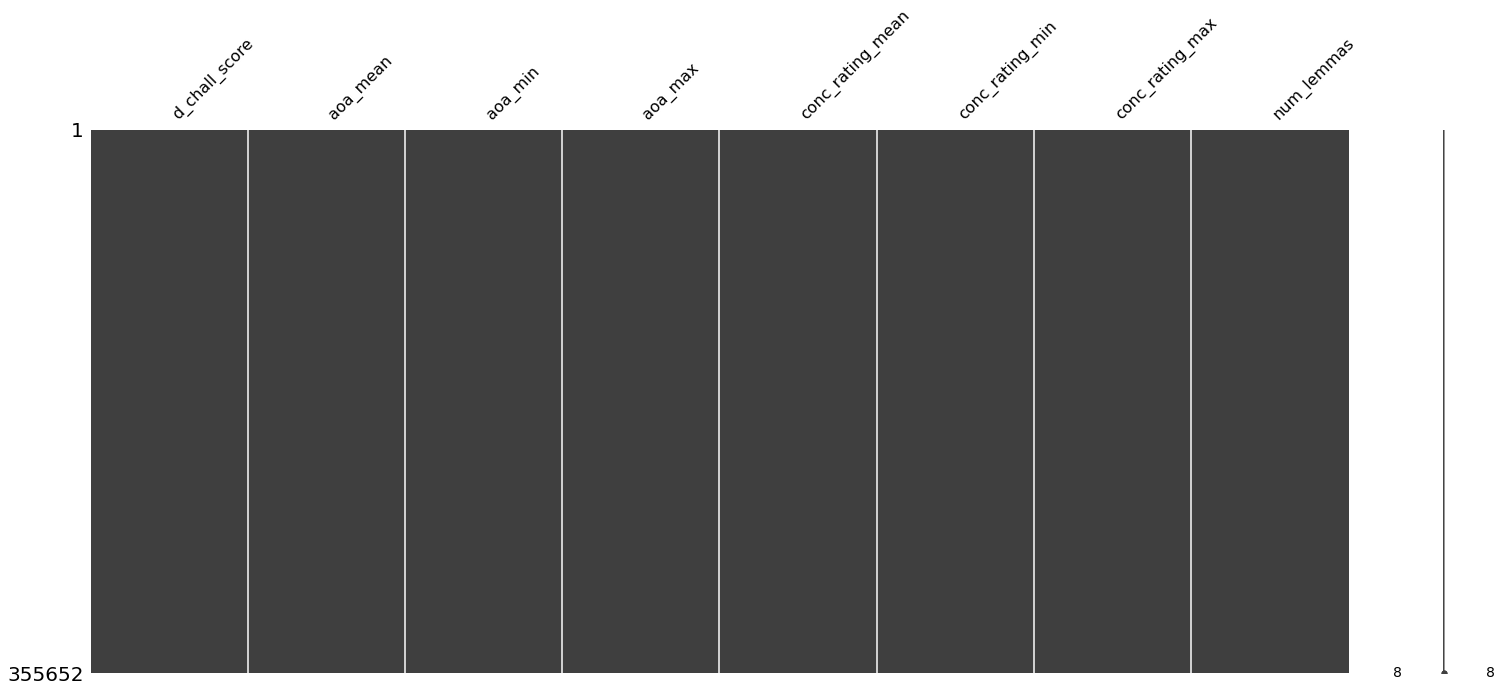

In [ ]:
msno.matrix(mads_features)

In [118]:
X_train_emb_mads = np.hstack((X_train_emb_std,
                               X_train_mads_features_std))

In [119]:
grid_dc_embmads_acc = GridSearchCV(DummyClassifier(), param_grid=param_grid)
grid_dc_embmads_acc.fit(X_train_emb_mads,y_train)

GridSearchCV(estimator=DummyClassifier(),
             param_grid={'strategy': ['most_frequent', 'prior', 'stratified',
                                      'uniform']})

In [120]:
grid_dc_embmads_acc.best_params_

{'strategy': 'most_frequent'}

In [121]:
X_test_emb_mads = np.hstack((X_test_emb_std,
                     X_test_mads_features_std))

model_name = 'embedding + Mads most_freq'
compute_metrics(grid_dc_embmads_acc.best_estimator_,
                model_name,
                X_test_emb_mads,
                y_test)

In [122]:
metrics = pd.DataFrame(metrics_df)

In [123]:
metrics

,model_name,model_instance,accuracy,precision,recall,aucprc,aucroc
0,Tf-idf DC most_freq,DummyClassifier(strategy='most_frequent'),0.518916,0.518916,1.0,"([0.518915909608523, 1.0], [1.0, 0.0], [1.0])",0.5
1,MADS DC most freq,"GridSearchCV(estimator=DummyClassifier(),\n ...",0.518916,0.518916,1.0,"([0.518915909608523, 1.0], [1.0, 0.0], [1.0])",0.5
2,Tf-idf Mads DC most freq,DummyClassifier(strategy='most_frequent'),0.518916,0.518916,1.0,"([0.518915909608523, 1.0], [1.0, 0.0], [1.0])",0.5
3,embedding DC most freq,DummyClassifier(strategy='most_frequent'),0.518916,0.518916,1.0,"([0.518915909608523, 1.0], [1.0, 0.0], [1.0])",0.5
4,embedding + Mads most_freq,DummyClassifier(strategy='most_frequent'),0.518916,0.518916,1.0,"([0.518915909608523, 1.0], [1.0, 0.0], [1.0])",0.5


In [ ]:
import pickle

In [ ]:
best_model = metrics.iloc[2]['model_instance']

In [ ]:
f = open('drive/Shareddrives/Milestone 2/nb_model.txt','wb')
pickle.dump(best_model,f)